# Movie Rating

## Loading Datasets into the model.

In [1]:
import pandas as pd
df=pd.read_csv('mrating.csv') #Reading Data from excel format using read_csv command.
df1=pd.read_csv('mrating.csv')  #copy dataset into a new variable.
df #Display Data set.

,userId,movieId,rating,title,genres,tag,genome_score
0,3,1,4.0,Toy Story,fantasy,Watched,0.09725
1,6,1,5.0,Toy Story,fantasy,computer animation,0.01225
2,8,1,4.0,Toy Story,fantasy,Disney animated feature,0.01675
3,10,1,4.0,Toy Story,fantasy,Pixar animation,0.20675
4,11,1,4.5,Toy Story,fantasy,Pixar animation,0.01575
...,...,...,...,...,...,...,...
992,3207,179,3.0,Mad Love,Romance,NaN,0.03775
993,3259,179,2.0,Mad Love,Romance,NaN,0.02250
994,3318,179,3.0,Mad Love,Romance,NaN,0.02950
995,3550,179,4.0,Mad Love,Romance,NaN,0.02200


In [2]:
df['genres'].value_counts() #Returns the total count of unique values in the specified column of the tabled data.

comedy       260
Action       258
Drama        225
Adventure     80
crime         78
Romance       67
fantasy       29
Name: genres, dtype: int64

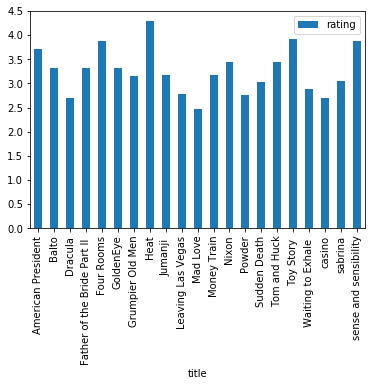

In [3]:
import matplotlib.pyplot as plt #imports packages needed for visualizing datasets in the form of  graphs and charts.
import numpy as np #imports NumPy packages which are general purpose array handling packages and some tools to deal the arrays.
gp=df[['rating','title']] #copy 'rating' and 'title' columns into another variable 
gp.groupby('title').agg(np.mean).plot(kind='bar') #plotting title and rating into a Bar-graph based on average ratings

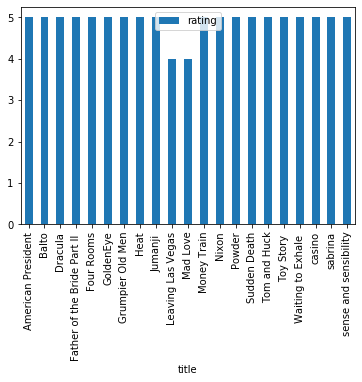

In [4]:
gp.groupby('title').agg(np.max).plot(kind='bar')#plotting title and rating into a Bar-graph based on maximum ratings.

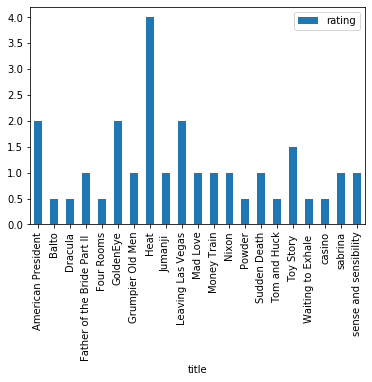

In [5]:
gp.groupby('title').agg(np.min).plot(kind='bar')  #plotting title and rating into a Bar-graph based on minimum ratings.

## Pre-processing Datasets

In [6]:
df.columns #Display all the column names in the Dataset.

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'tag',
       'genome_score'],
      dtype='object')

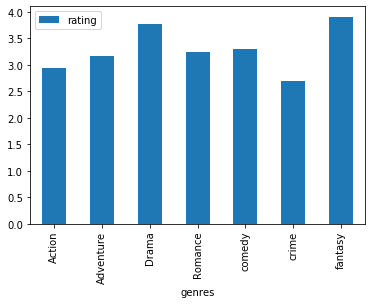

In [7]:
gp=df[['rating','genres']]  #copy rating and genres.
gp.groupby('genres').agg(np.mean).plot(kind='bar') #Display genres column based on average rating.

In [8]:
df.fillna(0,inplace=True) #inplace parameter is  used to set permission to modify without assigning to a variable and fillna is used to replace '0' if inplace is true.
from sklearn.preprocessing import LabelEncoder #import label encoders to convert data into numericall form by assigning labels to each unique piece of data.
l=LabelEncoder() #assigning label encoder to a variable for furtuher operations.
df['title']=l.fit_transform(df['title']) #create new labels for each movie title and scales them using fit_transform stores in a variable.
df['genres']=l.fit_transform(df['genres']) #create new lables for each genre and scales them using fit_transform.

In [9]:
df1['genres'].unique() #returns unique values in genres column.

array(['fantasy', 'Adventure', 'comedy', 'Action', 'Romance', 'Drama',
       'crime'], dtype=object)

In [10]:
#df1['title']=l.fit_transform(df1['title'])
df['genres'].unique() #returns unique values of the column.

array([6, 1, 4, 0, 3, 2, 5])

In [11]:
df1['title'].unique()

array(['Toy Story ', 'Jumanji ', 'Grumpier Old Men', 'Waiting to Exhale ',
       'Father of the Bride Part II ', 'Heat', 'sabrina', 'Tom and Huck',
       'Sudden Death', 'GoldenEye', 'American President', 'Dracula',
       'Balto', 'Nixon', 'casino', 'sense and sensibility', 'Four Rooms',
       'Money Train', 'Powder', 'Leaving Las Vegas', 'Mad Love'],
      dtype=object)

In [12]:
df['title'].unique() #returns unique values of the column.

array([16,  8,  6, 17,  3,  7, 19, 15, 14,  5,  0,  2,  1, 12, 18, 20,  4,
       11, 13,  9, 10])

In [13]:
nf=[]
def fun(rating,freq):  # A function for categorising movies with function and frequency values.
    for r,f in zip(rating,freq): #zip function joins together two or more iterables like lists, tuples.
        if r>=5 and f>=0.09:
            c="good"
        elif r>=4 and f>=0.09:
            c="Above average"
        elif r>=3 and f>=0.1:
             c="average"
        else:
            c="poor"
        nf.append(c)  #adds values to the exisitng list nf[].
    
    

In [14]:
nf1=[]
def fun1(freq1): # A function for sorting movies based on frrequency of movies.
        for freq in freq1:
            if freq>=0.1:
                c="good"
            elif freq>=0.09 and freq<=0.1:
                c="Average"
            else:
                c="poor"
            nf1.append(c)  #adds values to the exisitng list nf1[].

In [15]:
rating1=list(df['rating']) #creates list of rating column.
freq1=list(df['genome_score']) #creates list of gnome_score column.
fun(rating1,freq1)
fun1(freq1)

In [16]:
df['outcome']=nf
df['freqoutcome']=nf1

In [17]:
df['outcome'].unique()

array(['Above average', 'poor', 'average', 'good'], dtype=object)

In [18]:
df['freqoutcome'].unique()


array(['Average', 'poor', 'good'], dtype=object)

In [19]:
df.head(5) # .head(5) function Displays top 5 rows of the dataset.

,userId,movieId,rating,title,genres,tag,genome_score,outcome,freqoutcome
0,3,1,4.0,16,6,Watched,0.09725,Above average,Average
1,6,1,5.0,16,6,computer animation,0.01225,poor,poor
2,8,1,4.0,16,6,Disney animated feature,0.01675,poor,poor
3,10,1,4.0,16,6,Pixar animation,0.20675,Above average,good
4,11,1,4.5,16,6,Pixar animation,0.01575,poor,poor


In [20]:
df.fillna(0,inplace=True) #inplace parameter is  used to set permission to modify without assigning to a variable and fillna is used to replace '0' if inplace is true.

In [21]:
list1=df1['title'] #creates list of titles.
list2=df['genres'] #creates list of genres.
dict1=dict(zip(list1,list2)) 
def fun3(value):
    
    for x in dict1:
        if x==value:
            return dict1.get(x)


In [22]:
list11=df1['title'].unique() #return unique values of title column from df1 variable.
list22=df['title'].unique() #return unique values of title column from df variable.
dict11=dict(zip(list11,list22)) #dict() is used to connect two values as pair which points one to other, here zip vslues are paired together.
def fun4(value):
    
    for x in dict11:
        if x==value:
            return dict11.get(x) #get(x) returns value of x.

In [23]:
dict11

{'Toy Story ': 16,
 'Jumanji ': 8,
 'Grumpier Old Men': 6,
 'Waiting to Exhale ': 17,
 'Father of the Bride Part II ': 3,
 'Heat': 7,
 'sabrina': 19,
 'Tom and Huck': 15,
 'Sudden Death': 14,
 'GoldenEye': 5,
 'American President': 0,
 'Dracula': 2,
 'Balto': 1,
 'Nixon': 12,
 'casino': 18,
 'sense and sensibility': 20,
 'Four Rooms': 4,
 'Money Train': 11,
 'Powder': 13,
 'Leaving Las Vegas': 9,
 'Mad Love': 10}

In [24]:
inp=fun3('Powder')
mcode=fun4('Powder')
inp,mcode

(0, 13)

In [25]:
df9=df[df['genres']==inp]
df9

,userId,movieId,rating,title,genres,tag,genome_score,outcome,freqoutcome
197,424,6,5.0,7,0,Natalie Portman,0.01125,poor,poor
198,427,6,5.0,7,0,Robert De Niro,0.02025,poor,poor
199,435,6,4.0,7,0,Val Kilmer,0.04975,poor,poor
200,461,6,4.0,7,0,ending lame,0.25475,Above average,good
201,465,6,4.0,7,0,Al Pacino,0.66500,Above average,good
...,...,...,...,...,...,...,...,...,...
979,6879,20,2.0,9,0,Jim Carrey,0.03700,poor,poor
980,6929,20,3.0,9,0,Jim Carrey,0.15950,average,good
981,6978,20,2.0,9,0,detective,0.19775,poor,good
982,7036,20,3.0,9,0,Jim Carrey,0.01200,poor,poor


## Splitting and Training the Dataset 

In [26]:
X=df9['title']
y=df9['outcome']

### Multinomial Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state = 0) #Splitting the data into given size (0.25) which is default size.
from sklearn.linear_model import LogisticRegression #importing logistic regression packages and tools from sklearn.
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial') #uses solver ibfg algorithm, class as multinomial algorithm.
X_train=np.array(X_Train).reshape(-1,1) #reshapes the size of the array without changing contents of it.
y_train=np.array(Y_Train).reshape(-1,1) #reshapes the size of the array without changing contents of it.
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train) #fits the data perfectly for prediction.

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [28]:
output=logreg.predict([[inp]]) #predicts the labels of the vairables in datasets based on the training datasets.
out=output[0]
df8=df9[df9['outcome']==out]
titles=df8['title']


In [29]:
tlist=[]
def fun33(value):
    
    for x in dict11:
        if dict11[x]==value:
            tlist.append(x)
    
for k in titles:
    fun33(k)
print(set(tlist))

{'Leaving Las Vegas', 'Heat', 'Sudden Death', 'Powder', 'sabrina', 'GoldenEye'}


In [30]:
import numpy as np
y_pred=logreg.predict(np.array(X_Test).reshape(-1,1)) #predicts the labels of the vairables in datasets based on the training datasets.
from sklearn.metrics import accuracy_score
score1=accuracy_score(Y_Test,y_pred)
print(score1)

0.8307692307692308


In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred=logreg.predict(np.array(X_Test).reshape(-1,1))  #predicts the labels of the vairables in datasets based on the training datasets.
print(confusion_matrix(Y_Test,y_pred)) #prints confusion matrix.
print(classification_report(Y_Test,y_pred)) 

[[ 0  0  0  3]
 [ 0  0  0  7]
 [ 0  0  0  1]
 [ 0  0  0 54]]
               precision    recall  f1-score   support

Above average       0.00      0.00      0.00         3
      average       0.00      0.00      0.00         7
         good       0.00      0.00      0.00         1
         poor       0.83      1.00      0.91        54

     accuracy                           0.83        65
    macro avg       0.21      0.25      0.23        65
 weighted avg       0.69      0.83      0.75        65



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## K Nearest Neighbours 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)  #fits the data perfectly for prediction.
y_pred1=knn.predict(np.array(X_Test).reshape(-1,1))  #predicts the labels of the vairables in datasets based on the training datasets.
score2=accuracy_score(Y_Test,y_pred1) #gives the accuracy by testing and prediction.
print(score2) #prints the accuracy of the algorithm.

0.8307692307692308


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred1=knn.predict(np.array(X_Test).reshape(-1,1)) #predicts the labels of the vairables in datasets based on the training datasets.
print(confusion_matrix(Y_Test,y_pred1)) #prints the confusion matrix.
print(classification_report(Y_Test,y_pred1))

[[ 0  0  0  3]
 [ 0  0  0  7]
 [ 0  0  0  1]
 [ 0  0  0 54]]
               precision    recall  f1-score   support

Above average       0.00      0.00      0.00         3
      average       0.00      0.00      0.00         7
         good       0.00      0.00      0.00         1
         poor       0.83      1.00      0.91        54

     accuracy                           0.83        65
    macro avg       0.21      0.25      0.23        65
 weighted avg       0.69      0.83      0.75        65



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree Classifier

0.8461538461538461


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


<BarContainer object of 1 artists>

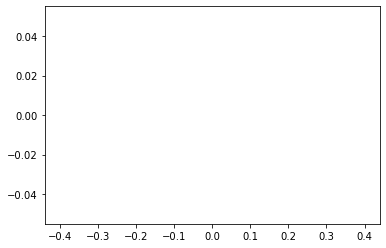

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)  #fits the data perfectly for prediction.
y_pred2=tree.predict(np.array(X_Test).reshape(-1,1)) #predicts the labels of the vairables in datasets based on the training datasets.
score3=accuracy_score(Y_Test,y_pred2)
print(score3) #Prints the Accuracy of the algorithm.

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred2=tree.predict(np.array(X_Test).reshape(-1,1)) #predicts the labels of the vairables in datasets based on the training datasets.
print(confusion_matrix(Y_Test,y_pred2))
print(classification_report(Y_Test,y_pred2)) #prints the confusion matrix.

[[ 1  0  0  2]
 [ 0  0  0  7]
 [ 0  0  0  1]
 [ 0  0  0 54]]
               precision    recall  f1-score   support

Above average       1.00      0.33      0.50         3
      average       0.00      0.00      0.00         7
         good       0.00      0.00      0.00         1
         poor       0.84      1.00      0.92        54

     accuracy                           0.85        65
    macro avg       0.46      0.33      0.35        65
 weighted avg       0.75      0.85      0.78        65



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Comparing accuracies of three algorithms

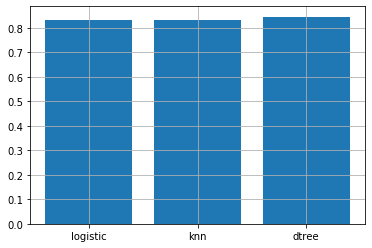

In [47]:
scores=[score1,score2,score3]
algos=["logistic","knn","dtree"]
plt.bar(algos,scores) # A bar graph representation of accuracies of all the algorithms.
plt.grid()